In [21]:
# Imports

from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load data

digits = load_digits()
X = digits.data
y = digits.target
df = pd.DataFrame(X, columns=digits.feature_names)
df['target'] = y

In [24]:
# Remove nulls
print(f"Before removing nulls: {df.shape[0]}")
df = df.dropna(how='any',axis=0)
print(f"After removing nulls: {df.shape[0]}")

# Remove duplicates
print(f"Before removing duplicates: {df.shape[0]}")
df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape[0]}")

# Remove blanks
df = df.replace('', np.nan)

# Convert all columns to numeric. Errors can be coerced to NaN.
df = df.apply(pd.to_numeric, errors='coerce')

Before removing nulls: 1797
After removing nulls: 1797
Before removing duplicates: 1797
After removing duplicates: 1797


In [25]:
# Data type inspection
print(df.dtypes)

feature_names = digits.feature_names

for col in df.columns:
    print(f"Feature {col}: {df[col].value_counts()}")

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
target         int64
Length: 65, dtype: object
Feature pixel_0_0: pixel_0_0
0.0    1797
Name: count, dtype: int64
Feature pixel_0_1: pixel_0_1
0.0    1531
1.0     128
2.0      67
3.0      32
4.0      22
5.0       9
6.0       3
7.0       3
8.0       2
Name: count, dtype: int64
Feature pixel_0_2: pixel_0_2
0.0     430
2.0     143
1.0     128
3.0     125
5.0     107
4.0     106
7.0     103
6.0      98
10.0     92
9.0      85
8.0      76
13.0     66
11.0     65
15.0     58
12.0     57
16.0     32
14.0     26
Name: count, dtype: int64
Feature pixel_0_3: pixel_0_3
16.0    380
15.0    219
12.0    206
13.0    198
14.0    191
11.0    101
10.0     99
9.0      73
8.0      71
0.0      50
1.0      37
6.0      36
7.0      35
5.0      29
2.0      25
4.0      24
3.0      23
Name: count, dtype: i


pixel_0_0
  Mean: 0.0000
  Median: 0.0000
  Std Dev: 0.0000
  Min: 0.0000
  Max: 0.0000
  Skewness: 0.0000
  Kurtosis: 0.0000

pixel_0_1
  Mean: 0.3038
  Median: 0.0000
  Std Dev: 0.9072
  Min: 0.0000
  Max: 8.0000
  Skewness: 4.0049
  Kurtosis: 19.2467

pixel_0_2
  Mean: 5.2048
  Median: 4.0000
  Std Dev: 4.7548
  Min: 0.0000
  Max: 16.0000
  Skewness: 0.5962
  Kurtosis: -0.8098

pixel_0_3
  Mean: 11.8358
  Median: 13.0000
  Std Dev: 4.2488
  Min: 0.0000
  Max: 16.0000
  Skewness: -1.2447
  Kurtosis: 0.8386

pixel_0_4
  Mean: 11.8481
  Median: 13.0000
  Std Dev: 4.2874
  Min: 0.0000
  Max: 16.0000
  Skewness: -1.1355
  Kurtosis: 0.4516

pixel_0_5
  Mean: 5.7819
  Median: 4.0000
  Std Dev: 5.6664
  Min: 0.0000
  Max: 16.0000
  Skewness: 0.5458
  Kurtosis: -1.1734

pixel_0_6
  Mean: 1.3623
  Median: 0.0000
  Std Dev: 3.3258
  Min: 0.0000
  Max: 16.0000
  Skewness: 2.8506
  Kurtosis: 7.6130

pixel_0_7
  Mean: 0.1297
  Median: 0.0000
  Std Dev: 1.0374
  Min: 0.0000
  Max: 15.0000
  Skewn

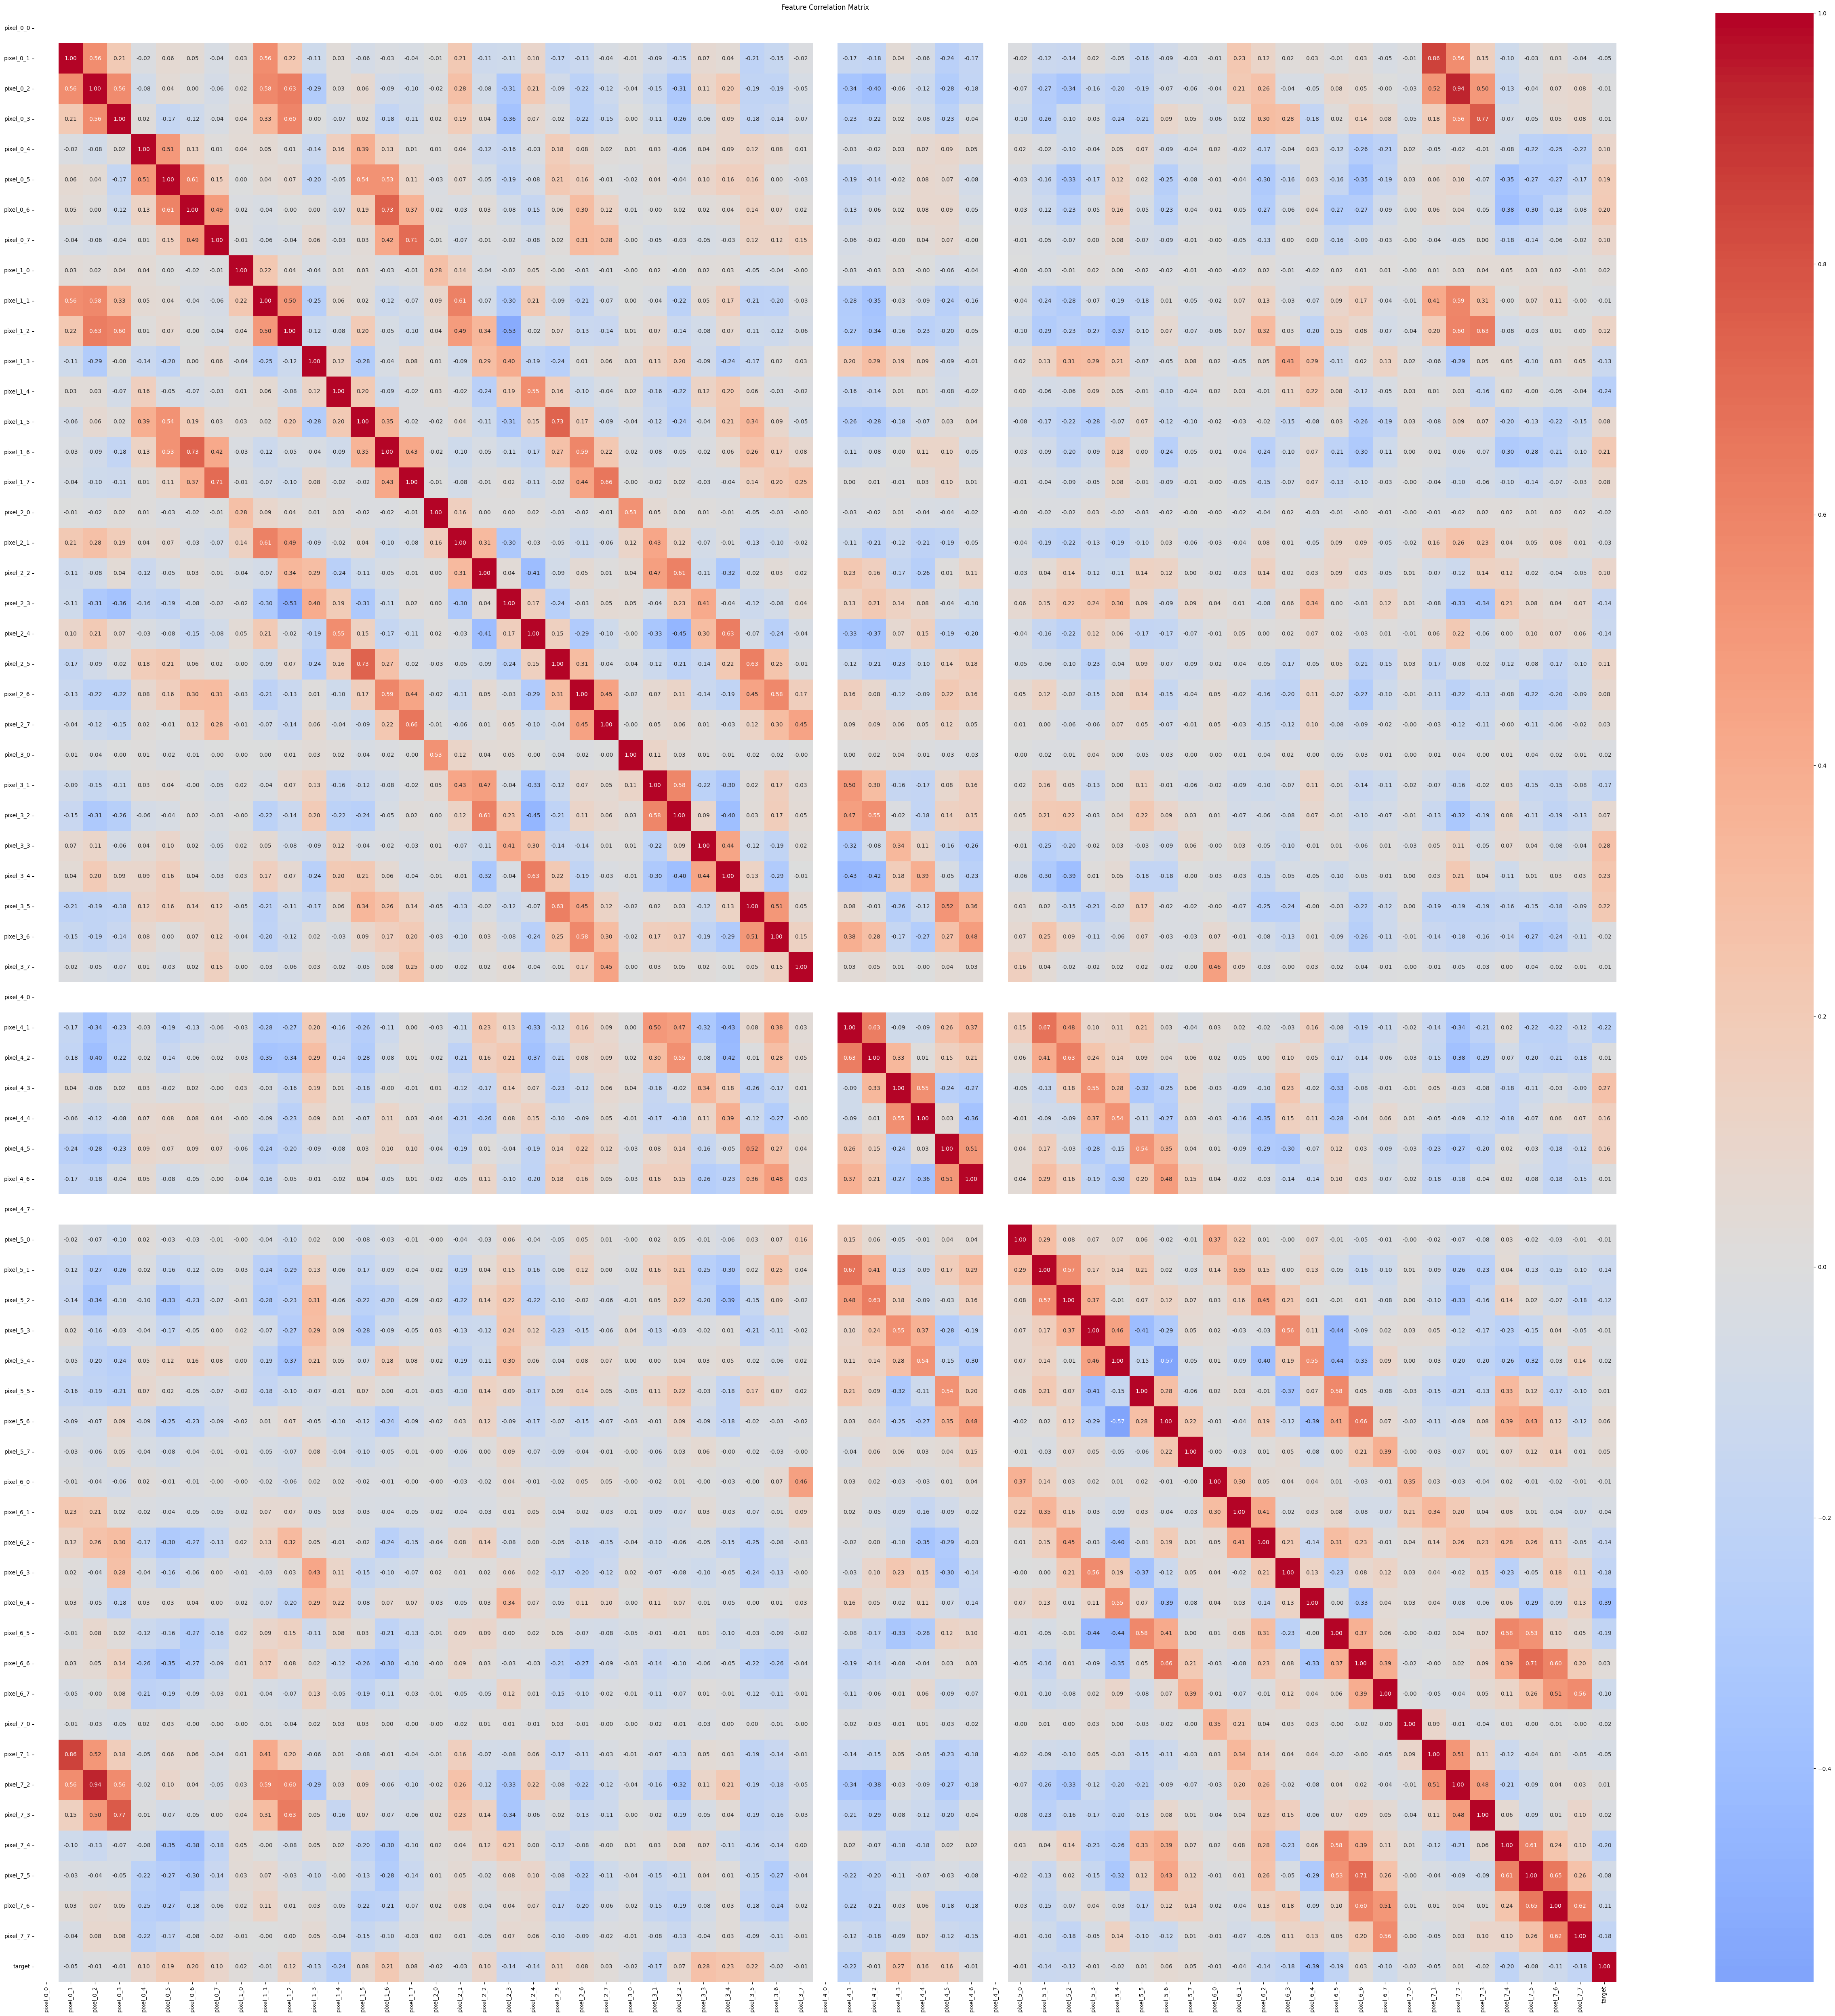

In [26]:
# Statistics
for col in df.columns:
    print(f"\n{col}")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Std Dev: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
    print(f"  Skewness: {df[col].skew():.4f}")
    print(f"  Kurtosis: {df[col].kurtosis():.4f}")

plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

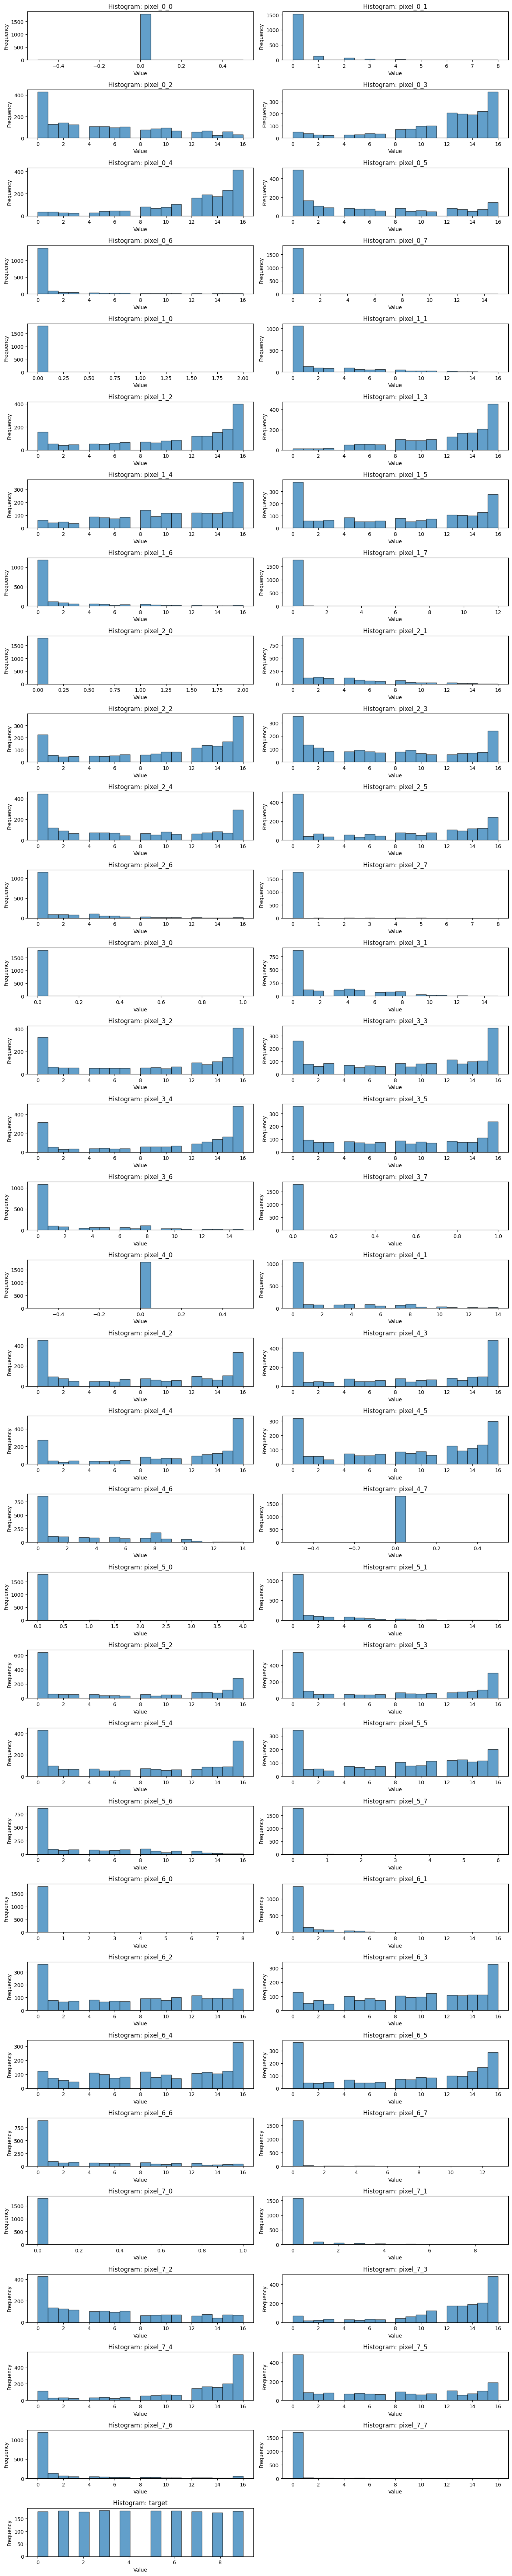

In [30]:
fig, axes = plt.subplots(33, 2, figsize=(14, 70))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Histogram: {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Hide the extra subplot (12th subplot for 11 columns)
axes[-1].set_visible(False)

plt.tight_layout()

plt.show()

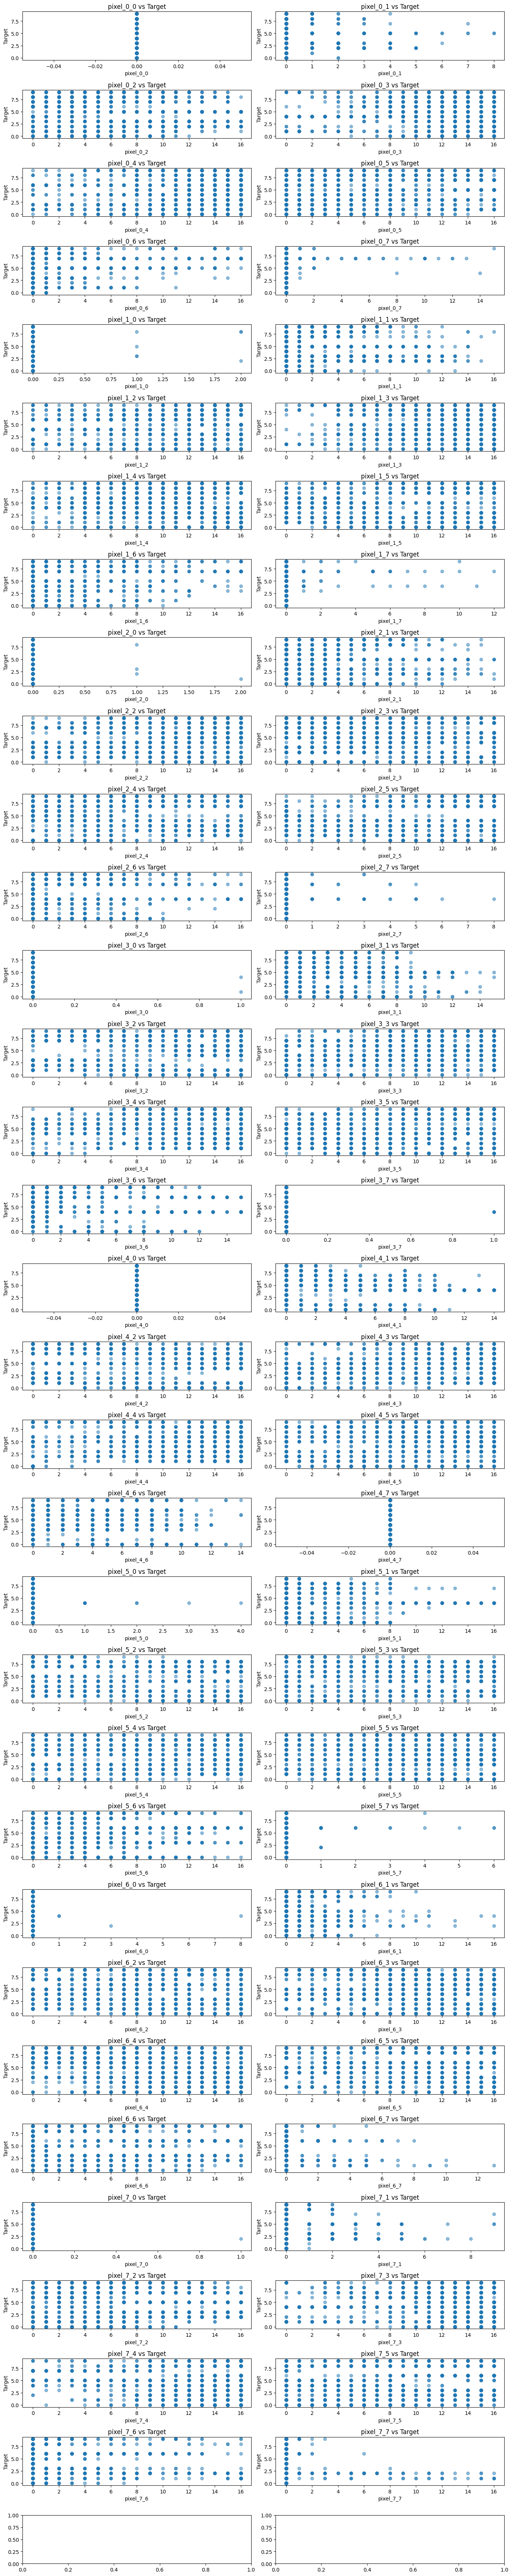

In [32]:
fig, axes = plt.subplots(33, 2, figsize=(14, 70))
axes = axes.ravel()

feature_cols = [col for col in df.columns if col != 'target']
for idx, col in enumerate(feature_cols):
    axes[idx].scatter(df[col], df['target'], alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Target')
    axes[idx].set_title(f'{col} vs Target')

plt.tight_layout()
plt.show()

In [ ]:
class MLP():
    def __init__(self, input_size, hidden_size, output_size, lr):
        # initialize weights and biases for input-hidden and hidden-output layers
        self.hidden_weights = [[1 for i in range(input_size)] for j in range(hidden_size)]
        self.hidden_biases = [0 for j in range(hidden_size)]
        self.output_weights = [[1 for i in range(hidden_size)] for j in range(output_size)]
        self.output_biases = [0 for j in range(output_size)]
        self.lr = lr

    def relu(self, Z):
        # ReLU activation function
        return [max(0, x) for x in Z]

    def relu_derivative(self, Z):
        # derivative of ReLU for backpropagation
        return [1 if x > 0 else 0 for x in Z]

    def softmax(self, Z):
        # softmax function for output layer
        total = sum([np.exp(x) for x in Z])
        return [np.exp(x) / total for x in Z]

    def fit(self, X, y, epochs):
        # forward pass: compute hidden and output layer activations
        # compute loss and backpropagate errors
        # update weights and biases
        for e in epochs:
            for inp, out in zip(X, y):
                predicted = self.predict(inp)
                # TODO
                

    def predict(self, X):
        # compute predictions for input X
        # return class labels
        hidden_vals = [sum([X[j] * self.hidden_weights[i][j] for j in range(len(self.hidden_weights[i]))]) + self.hidden_biases[i] for i in range(len(self.hidden_biases))]
        hidden_output = self.relu(hidden_vals)
        output_vals = [sum([hidden_vals[j] * self.output_weights[i][j] for j in range(len(self.output_weights[i]))]) + self.output_biases[i] for i in range(len(self.output_biases))]
        outputs = self.softmax(output_vals)
        return outputs


IndentationError: expected an indented block after function definition on line 14 (2966061682.py, line 18)